# Talib
### [說明文件](https://mrjbq7.github.io/ta-lib/)
### [套件下載](https://www.lfd.uci.edu/~gohlke/pythonlibs/#ta-lib)
### [Talib庫詳解](https://www.fmz.com/bbs-topic/1234)

In [38]:
%matplotlib inline
%pylab inline
import pandas as pd
import talib

Populating the interactive namespace from numpy and matplotlib


In [39]:
print(len(talib.get_functions()))
print(talib.get_functions())

158
['HT_DCPERIOD', 'HT_DCPHASE', 'HT_PHASOR', 'HT_SINE', 'HT_TRENDMODE', 'ADD', 'DIV', 'MAX', 'MAXINDEX', 'MIN', 'MININDEX', 'MINMAX', 'MINMAXINDEX', 'MULT', 'SUB', 'SUM', 'ACOS', 'ASIN', 'ATAN', 'CEIL', 'COS', 'COSH', 'EXP', 'FLOOR', 'LN', 'LOG10', 'SIN', 'SINH', 'SQRT', 'TAN', 'TANH', 'ADX', 'ADXR', 'APO', 'AROON', 'AROONOSC', 'BOP', 'CCI', 'CMO', 'DX', 'MACD', 'MACDEXT', 'MACDFIX', 'MFI', 'MINUS_DI', 'MINUS_DM', 'MOM', 'PLUS_DI', 'PLUS_DM', 'PPO', 'ROC', 'ROCP', 'ROCR', 'ROCR100', 'RSI', 'STOCH', 'STOCHF', 'STOCHRSI', 'TRIX', 'ULTOSC', 'WILLR', 'BBANDS', 'DEMA', 'EMA', 'HT_TRENDLINE', 'KAMA', 'MA', 'MAMA', 'MAVP', 'MIDPOINT', 'MIDPRICE', 'SAR', 'SAREXT', 'SMA', 'T3', 'TEMA', 'TRIMA', 'WMA', 'CDL2CROWS', 'CDL3BLACKCROWS', 'CDL3INSIDE', 'CDL3LINESTRIKE', 'CDL3OUTSIDE', 'CDL3STARSINSOUTH', 'CDL3WHITESOLDIERS', 'CDLABANDONEDBABY', 'CDLADVANCEBLOCK', 'CDLBELTHOLD', 'CDLBREAKAWAY', 'CDLCLOSINGMARUBOZU', 'CDLCONCEALBABYSWALL', 'CDLCOUNTERATTACK', 'CDLDARKCLOUDCOVER', 'CDLDOJI', 'CDLDOJIST

In [40]:
#import talib
from talib import abstract
print(talib.abstract.SMA)

SMA([input_arrays], [timeperiod=30])

Simple Moving Average (Overlap Studies)

Inputs:
    price: (any ndarray)
Parameters:
    timeperiod: 30
Outputs:
    real


In [41]:
df = pd.read_csv('^TWII.csv')
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-09-05,10584.099609,10617.839844,10564.259766,10617.839844,10617.839844,2678200
1,2017-09-06,10593.870117,10604.919922,10519.709961,10547.860352,10547.860352,2731100
2,2017-09-07,10564.790039,10604.019531,10509.910156,10538.509766,10538.509766,3130500
3,2017-09-08,10553.900391,10609.950195,10550.719727,10609.950195,10609.950195,2733700
4,2017-09-11,10630.160156,10656.250000,10565.780273,10572.160156,10572.160156,2888400


# 均線MA

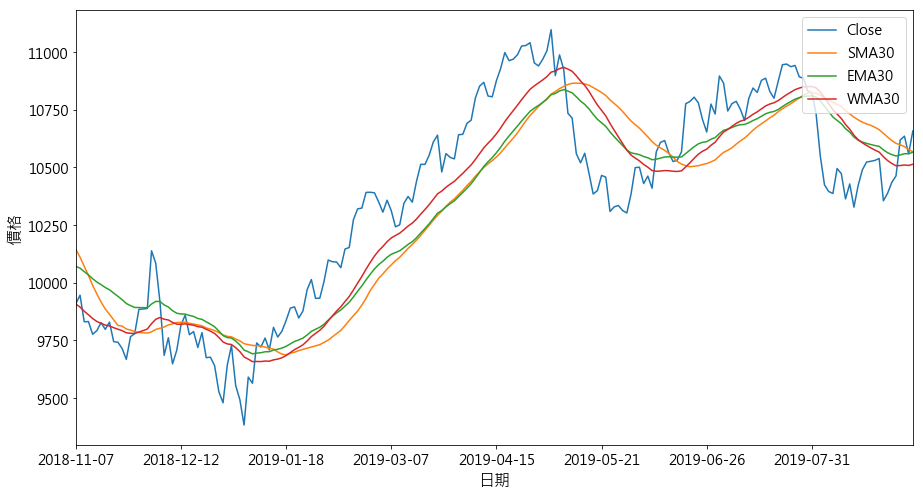

In [42]:
import matplotlib.pyplot as plt
df1 = df[['Date', 'Close']]
df1 = df1.set_index('Date')
df1['SMA30'] = talib.SMA(df1['Close'], timeperiod=30)
df1['EMA30'] = talib.EMA(df1['Close'], timeperiod=30)
df1['WMA30'] = talib.WMA(df1['Close'], timeperiod=30)

df1[['Close','SMA30','EMA30','WMA30']].tail(200).plot(figsize=(15, 8))
plt.xlabel('日期', fontsize=16)
plt.ylabel('價格', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(loc = 1, fontsize=14)
plt.show()

# KD

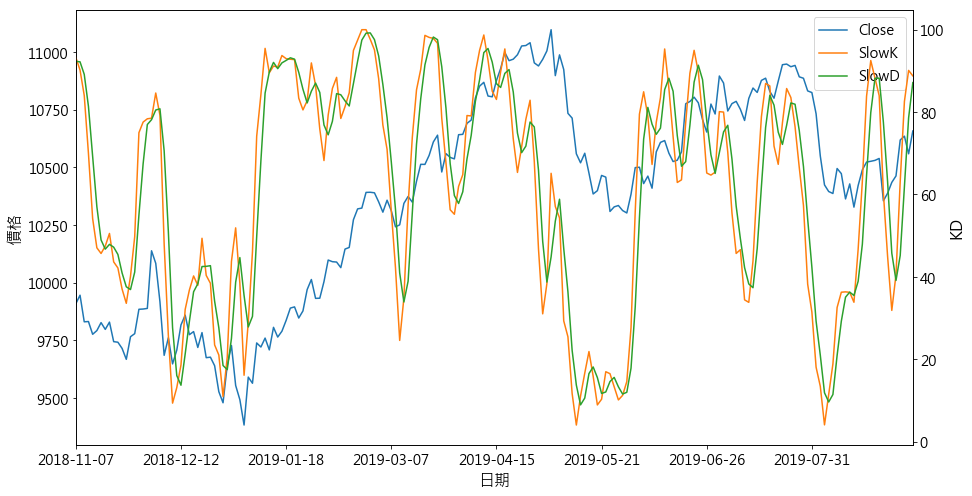

In [43]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
df1 = pd.read_csv('^TWII.csv')
df1 = df1.set_index('Date')
df1.index.name = "日期"

slowk,slowd = talib.STOCH(df1['High'], df1['Low'], df1['Close'], fastk_period = 9,slowk_period=3,slowd_period=3)
df1['SlowK'] = slowk
df1['SlowD'] = slowd
ax = df1['Close'].tail(200).plot(figsize=(15, 8))
plt.xlabel( "日期", fontsize=16)
plt.ylabel('價格', fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

ax2 = df1[['SlowK','SlowD']].tail(200).plot(ax=ax, secondary_y=True, legend = False)
plt.ylabel('KD', fontsize=16)
plt.yticks(fontsize=14)

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax.legend(h1+h2, l1+l2, loc=1, fontsize=14)
plt.show()

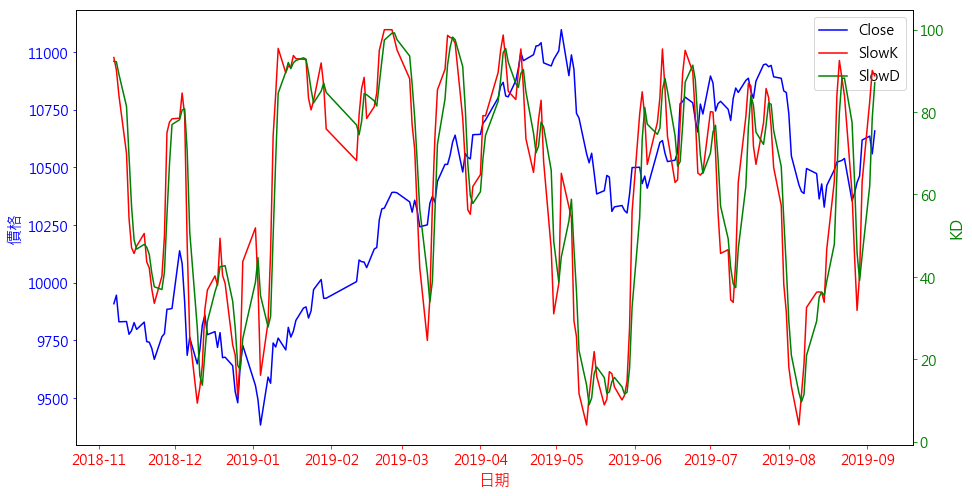

In [44]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import talib
df1 = pd.read_csv('^TWII.csv')
slowk,slowd = talib.STOCH(df1['High'], df1['Low'], df1['Close'], fastk_period = 9, slowk_period=3, slowd_period=3)
df1['SlowK'] = slowk
df1['SlowD'] = slowd
df1['Date'] = df1['Date'].apply(lambda x: datetime.datetime.strptime(x, '%Y-%m-%d'))

date = df1['Date'].tail(200)
colse = df1['Close'].tail(200)
k = df1['SlowK'].tail(200)
d = df1['SlowD'].tail(200)


fig, ax1 = plt.subplots(figsize = (15,8))
ax1.set_xlabel('日期', fontsize=16, color='r')
ax1.set_ylabel('價格', fontsize=16, color='b')
#plt.xlabel('日期', fontsize=16)
#plt.ylabel('價格', fontsize=16)
ax1.tick_params(axis='x', labelsize=14, colors = 'r')
ax1.tick_params(axis='y', labelsize=14, colors = 'b')
#ax1.tick_params(axis='both', labelsize=14)
#plt.xticks(fontsize=14)
#plt.yticks(fontsize=14)

ax2 = ax1.twinx()
ax2.set_ylabel('KD', fontsize=16, color='g')
#plt.ylabel('KD', fontsize=16)
ax2.tick_params(axis='y', labelsize=14, colors = 'g')
#plt.yticks(fontsize=14)

ax1.plot(date, colse, 'b')
ax2.plot(date, k, 'r')
ax2.plot(date, d, 'g')

h1, l1 = ax1.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax1.legend(h1+h2, l1+l2, loc=1, fontsize=14)

plt.show()

# RSI

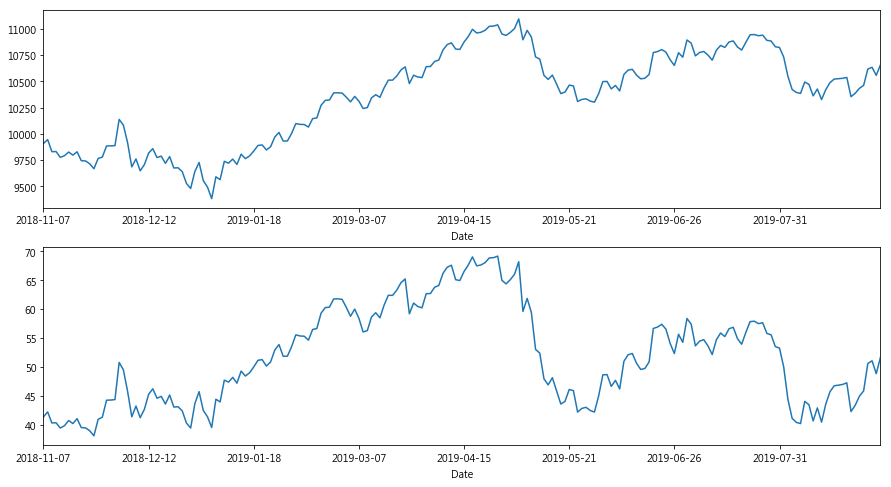

In [45]:
df1 = df
df1 = df1.set_index('Date')
df1['RSI30'] = talib.RSI(df1['Close'], timeperiod=30)
fig, ax = plt.subplots(nrows=2)
df1['Close'].tail(200).plot(ax=ax[0], figsize=(15, 8))
df1['RSI30'].tail(200).plot(ax=ax[1], figsize=(15, 8))
plt.show()

# MACD

計算方法：

12日EMA的計算：EMA12 = 前一日EMA12 X 11/13 + 今日收盤X 2/13

26日EMA的計算：EMA26 = 前一日EMA26 X 25/27 + 今日收盤X 2/27

差離值（DIF）的計算： DIF = EMA12 - EMA26，即為talib-MACD返回值macd

根據差離值計算其9日的EMA，即離差平均值，是所求的DEA值。今日DEA = （前一日DEA X 8/10 + 今日DIF X 2/10），即為talib-MACD返回值signal

DIF與它自己的移動平均之間差距的大小一般BAR=（DIF-DEA) 2，即為MACD柱狀圖。但是talib中MACD的計算是bar = (dif-dea) 1

買賣原則為：

DIF-DEA均為正，買入信號參考。

DIF-DEA均為負，賣出信號參考。

- macd = 12 天 EMA - 26 天 EMA
- signal = 9 天 MACD的EMA
- hist = MACD - MACD signal

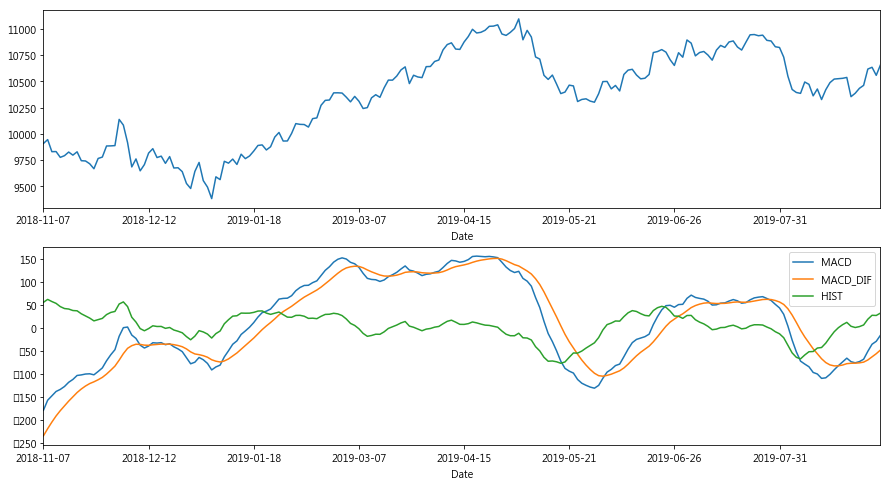

In [46]:
df1 = df
df1 = df1.set_index('Date')
macd, signal, hist = talib.MACD(df1['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df1['MACD'] = macd
df1['MACD_DIF'] = signal
df1['HIST'] = hist
fig, axes = plt.subplots(nrows=2)
df1['Close'].tail(200).plot(ax=axes[0], figsize=(15, 8))
df1[['MACD', 'MACD_DIF', 'HIST']].tail(200).plot(ax=axes[1], figsize=(15, 8))
plt.show()

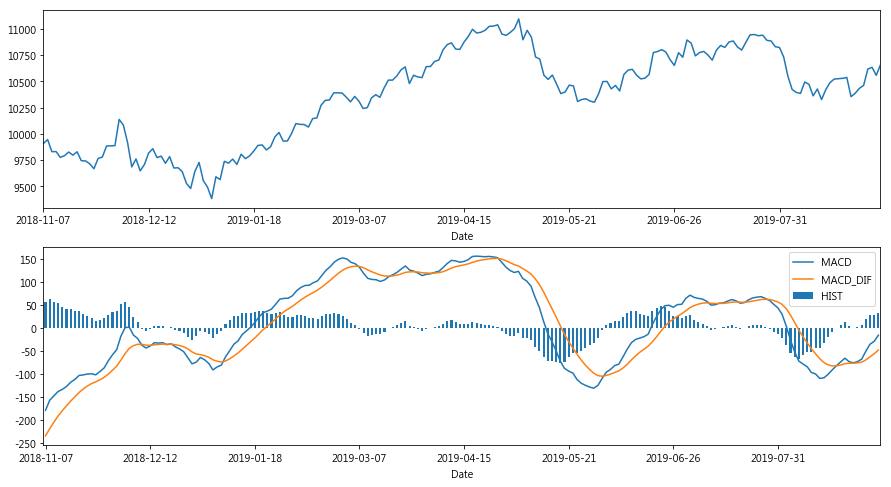

In [72]:
import matplotlib.pyplot as plt
plt.rcParams['axes.unicode_minus'] = False #用來正常顯示正負號

df1 = df
df1 = df1.set_index('Date')
macd, signal, hist = talib.MACD(df1['Close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df1['MACD'] = macd
df1['MACD_DIF'] = signal
df1['HIST'] = hist
fig, axes = plt.subplots(nrows=2)
df1['Close'].tail(200).plot(ax=axes[0], figsize=(15, 8))

ax = df1[['MACD', 'MACD_DIF']].tail(200).plot(ax=axes[1], figsize=(15, 8))
df1['HIST'].tail(200).plot(ax=ax, kind='bar', legend=True)

ax.set_xticks(range(0, len(df1.tail(200).index), 25))
ax.set_xticklabels(df1.tail(200).index[::25], rotation=0)

plt.show()

# pandas-datareader
### [參考文件PDF](https://readthedocs.org/projects/pandas-datareader/downloads/pdf/latest/)
### 安裝指令
- pip install pandas_datareader
- conda install pandas-datareader

In [1]:
!pip install pandas_datareader

In [280]:
import pandas_datareader.data as web
df = web.get_data_yahoo('AAPL', "2018-01-01")
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,172.300003,169.259995,170.160004,172.259995,25555900.0,167.701889
2018-01-03,174.550003,171.960007,172.529999,172.229996,29517900.0,167.672668
2018-01-04,173.470001,172.080002,172.539993,173.029999,22434600.0,168.451508
2018-01-05,175.369995,173.050003,173.440002,175.000000,23660000.0,170.369385
2018-01-08,175.610001,173.929993,174.350006,174.350006,20567800.0,169.736588


# DataReader 資料源 
# https://pandas-datareader.readthedocs.io/en/latest/remote_data.html

In [2]:
#1.要什麼資料, 2.從哪個來源來, 3.從什麼時候的資料開始
import pandas_datareader.data as web
df = web.DataReader('AAPL', 'yahoo')
df.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-12-09,270.799988,264.910004,270.000000,266.920013,32010600.0,266.920013
2019-12-10,270.070007,265.859985,268.600006,268.480011,22605100.0,268.480011
2019-12-11,271.100006,268.500000,268.809998,270.769989,19689200.0,270.769989
2019-12-12,272.559998,267.320007,267.779999,271.459991,34327600.0,271.459991
2019-12-13,275.299988,270.929993,271.459991,275.149994,33432806.0,275.149994


In [281]:
import pandas_datareader as pdr
df = pdr.DataReader('2330.TW', 'yahoo')
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2010-01-04,65.000000,64.000000,65.000000,64.900002,39407000.0,45.411293
2010-01-05,65.099998,63.900002,65.000000,64.500000,37138000.0,45.131405
2010-01-06,64.900002,63.700001,64.500000,64.900002,49261000.0,45.411293
2010-01-07,65.000000,64.199997,64.900002,64.199997,42134000.0,44.921494
2010-01-08,64.300003,63.500000,63.500000,64.000000,46076000.0,44.781555


In [2]:
import pandas_datareader as pdr
start = '2018-01-01'
end = '2018-12-31'
df = pdr.DataReader('2330.TW', 'yahoo', start, end)
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-01-02,232.5,231.0,231.5,232.5,18055269.0,215.476227
2018-01-03,238.0,235.5,236.0,237.0,29308091.0,219.646744
2018-01-04,240.0,236.5,240.0,239.5,29096613.0,221.963684
2018-01-05,240.0,238.0,240.0,240.0,22438255.0,222.427078
2018-01-08,242.5,240.5,242.0,242.0,20233692.0,224.280640


In [3]:
import pandas_datareader.data as web
df_stock = web.DataReader(['2330.TW', '0050.TW', '2412.TW'], 'yahoo', start, end)
df_stock.head()

Attributes       High                        Low                       Open  \
Symbols       0050.TW 2330.TW 2412.TW    0050.TW 2330.TW 2412.TW    0050.TW   
Date                                                                          
2018-01-02  82.599998   232.5   108.0  82.150002   231.0   105.5  82.150002   
2018-01-03  83.449997   238.0   108.0  82.949997   235.5   107.0  82.949997   
2018-01-04  83.650002   240.0   108.0  83.199997   236.5   107.5  83.500000   
2018-01-05  83.800003   240.0   108.5  83.300003   238.0   107.5  83.500000   
2018-01-08  84.150002   242.5   109.0  83.699997   240.5   108.0  83.800003   

Attributes                      Close                     Volume              \
Symbols    2330.TW 2412.TW    0050.TW 2330.TW 2412.TW    0050.TW     2330.TW   
Date                                                                           
2018-01-02   231.5   106.0  82.599998   232.5   107.5  3613199.0  18055269.0   
2018-01-03   236.0   107.5  83.349998   237.0   108.0  7196437.0  29308091.0   
2018-01-04   240.0   108.0  83.500000   239.5   108.0  5627565.0  29096613.0   
2018-01-05   240.0   108.0  83.750000   240.0   108.5  7616796.0  22438255.0   
2018-01-08   242.0   108.5  84.099998   242.0   108.5  5189611.0  20233692.0   

Attributes              Adj Close                         
Symbols        2412.TW    0050.TW     2330.TW    2412.TW  
Date                                                      
2018-01-02  11863896.0  76.800766  215.476227  98.761932  
2018-01-03  12032898.0  77.498116  219.646744  99.221283  
2018-01-04  11011635.0  77.637581  221.963684  99.221283  
2018-01-05  16499196.0  77.870033  222.427078  99.680641  
2018-01-08   9758897.0  78.195450  224.280640  99.680641

In [4]:
df_stock.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 245 entries, 2018-01-02 to 2018-12-28
Data columns (total 18 columns):
(High, 0050.TW)         245 non-null float64
(High, 2330.TW)         245 non-null float64
(High, 2412.TW)         245 non-null float64
(Low, 0050.TW)          245 non-null float64
(Low, 2330.TW)          245 non-null float64
(Low, 2412.TW)          245 non-null float64
(Open, 0050.TW)         245 non-null float64
(Open, 2330.TW)         245 non-null float64
(Open, 2412.TW)         245 non-null float64
(Close, 0050.TW)        245 non-null float64
(Close, 2330.TW)        245 non-null float64
(Close, 2412.TW)        245 non-null float64
(Volume, 0050.TW)       245 non-null float64
(Volume, 2330.TW)       245 non-null float64
(Volume, 2412.TW)       245 non-null float64
(Adj Close, 0050.TW)    245 non-null float64
(Adj Close, 2330.TW)    245 non-null float64
(Adj Close, 2412.TW)    245 non-null float64
dtypes: float64(18)
memory usage: 36.4 KB


In [5]:
df = df_stock['Adj Close', '2330.TW']
df.head()

Date
2018-01-02    215.476227
2018-01-03    219.646744
2018-01-04    221.963684
2018-01-05    222.427078
2018-01-08    224.280640
Name: (Adj Close, 2330.TW), dtype: float64

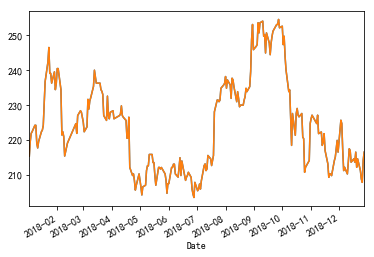

In [7]:
import matplotlib.pyplot as plt
df.plot()
plt.show()

Populating the interactive namespace from numpy and matplotlib


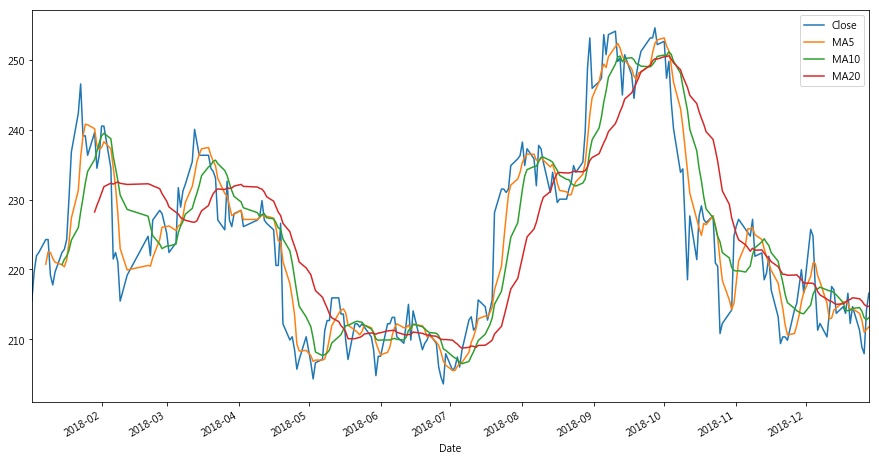

In [291]:
%pylab inline
p.plot(figsize = (15,8), label='Close')
p.rolling(window= 5).mean().plot(label='MA5')
p.rolling(10).mean().plot(label='MA10')
p.rolling(20).mean().plot(label='MA20')
plt.legend()

# 認識K線
![](./K線.jpg)
[圖片來源](https://emily01.com/invest-tips/1295)

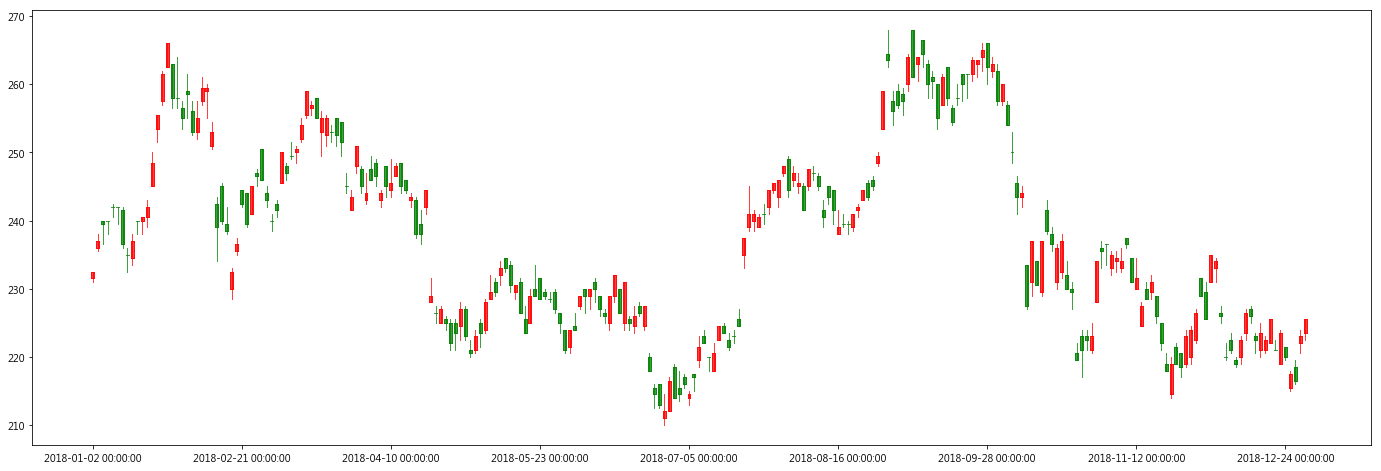

In [292]:
import mpl_finance as mpf
import pandas_datareader as pdr
start = '2018-01-01'
end = '2018-12-31'
df = pdr.DataReader('2330.TW', 'yahoo', start, end)

fig = plt.figure(figsize=(24, 8))

ax = fig.add_subplot(1, 1, 1)
ax.set_xticks(range(0, len(df.index), 30))
ax.set_xticklabels(df.index[::30])

mpf.candlestick2_ochl(ax, df['Open'], df['Close'], df['High'],
                      df['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75); 

# 金融圖表繪製套件 mpl-finance
### 從matplotlib 2.2.0版本開始，matplotlib.finance已經從matplotlib中獨立，繪製金融圖表需要單獨安裝mpl_finance
- 安裝指令 pip install mpl-finance

In [6]:
!pip install mpl-finance

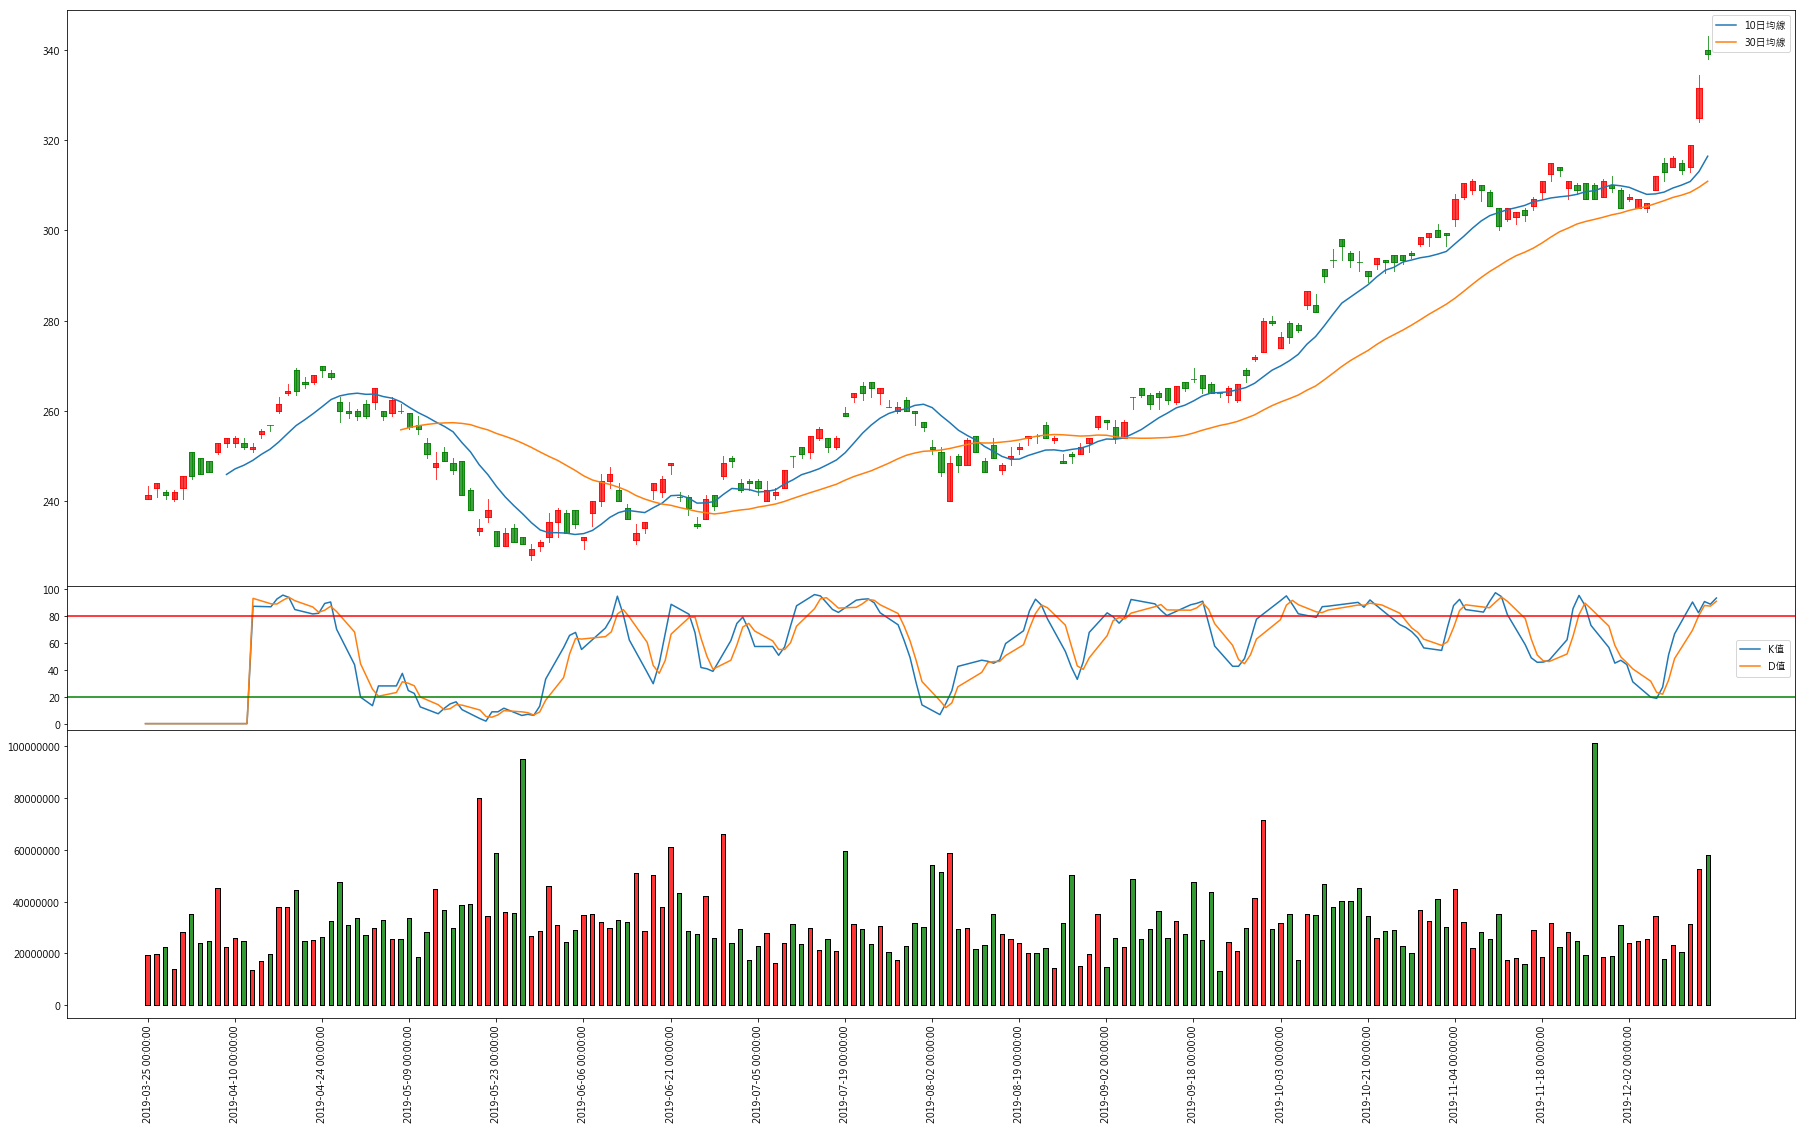

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
#import matplotlib.finance as mpf
import mpl_finance as mpf
import talib
import numpy as np
import pandas_datareader as pdr
#from matplotlib.ticker import ScalarFormatter, FormatStrFormatter

start = '2019-01-01'
end = '2019-12-31'
df = pdr.DataReader('2330.TW', 'yahoo', start, end).tail(180)


sma_10 = talib.SMA(np.array(df['Close']), 10)
sma_30 = talib.SMA(np.array(df['Close']), 30)
df['k'], df['d'] = talib.STOCH(df['High'], df['Low'], df['Close'], fastk_period = 9,slowk_period=3,slowd_period=3)
df['k'].fillna(value=0, inplace=True)
df['d'].fillna(value=0, inplace=True)

fig = plt.figure(figsize=(24, 20))

#用add_axes新增子區域
#left, bottom, width, height = 0,0.3,1,0.4
# x, y, ,width, height
ax = fig.add_axes([0, 0.3, 1, 0.4]) ##左下角座標 (0,0.3)，寬高 (1,0.4)
ax2 = fig.add_axes([0, 0.2, 1, 0.1])##左下角座標 (0,0.2)，寬高 (1,0.1)
ax3 = fig.add_axes([0, 0, 1, 0.2])  ##左下角座標 (0,0.1)，寬高 (1,0.2)

ax.set_xticks(range(0, len(df.index), 10))
ax.set_xticklabels(df.index[::10])
mpf.candlestick2_ochl(ax, df['Open'], df['Close'], df['High'],
                      df['Low'], width=0.6, colorup='r', colordown='g', alpha=0.75)

plt.rcParams['font.sans-serif']=['Microsoft JhengHei'] 
ax.plot(sma_10, label='10日均線')
ax.plot(sma_30, label='30日均線')

ax2.plot(df['k'], label='K值')
ax2.plot(df['d'], label='D值')

ax2.axhline(y=20, color='g', linestyle='-') #水平參考線
ax2.axhline(y=80, color='r', linestyle='-') #水平參考線

mpf.volume_overlay(ax3, df['Open'], df['Close'], df['Volume'], colorup='r', colordown='g', width=0.5, alpha=0.8)
ax3.set_xticks(range(0, len(df.index), 10))
ax3.set_xticklabels(df.index[::10],rotation=90)
#ax3.yaxis.set_major_formatter(FormatStrFormatter('%.0f')) #關閉科學記號顯示
ax3.get_yaxis().get_major_formatter().set_scientific(False)#關閉科學記號顯示

ax.legend();
ax2.legend();
#plt.show()